In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('../dataset/^NSEI.csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-02-27 09:30:00,17438.650391,17450.750000,17334.849609,17335.550781,17335.550781,0
1,2023-02-27 10:00:00,17334.949219,17345.449219,17301.699219,17324.449219,17324.449219,0
2,2023-02-27 10:30:00,17325.050781,17332.599609,17307.199219,17327.099609,17327.099609,0
3,2023-02-27 11:00:00,17327.250000,17381.300781,17324.599609,17351.900391,17351.900391,0
4,2023-02-27 11:30:00,17352.449219,17395.150391,17343.849609,17378.099609,17378.099609,0


In [3]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data['Date']= pd.to_datetime(data['Date'], format= '%Y-%m-%d %H:%M:%S')

In [6]:
data['dateDAY']= data['Date'].dt.day
data['dateMONTH']= data['Date'].dt.month
data['dateYR']= data['Date'].dt.year
data['hours']= data['Date'].dt.hour
data['min']= data['Date'].dt.minute

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,dateDAY,dateMONTH,dateYR,hours,min
0,2023-02-27 09:30:00,17438.650391,17450.750000,17334.849609,17335.550781,17335.550781,0,27,2,2023,9,30
1,2023-02-27 10:00:00,17334.949219,17345.449219,17301.699219,17324.449219,17324.449219,0,27,2,2023,10,0
2,2023-02-27 10:30:00,17325.050781,17332.599609,17307.199219,17327.099609,17327.099609,0,27,2,2023,10,30
3,2023-02-27 11:00:00,17327.250000,17381.300781,17324.599609,17351.900391,17351.900391,0,27,2,2023,11,0
4,2023-02-27 11:30:00,17352.449219,17395.150391,17343.849609,17378.099609,17378.099609,0,27,2,2023,11,30
...,...,...,...,...,...,...,...,...,...,...,...,...
463,2023-04-27 13:00:00,17848.900391,17874.849609,17842.349609,17872.599609,17872.599609,0,27,4,2023,13,0
464,2023-04-27 13:30:00,17873.250000,17891.050781,17870.150391,17888.500000,17888.500000,0,27,4,2023,13,30
465,2023-04-27 14:00:00,17889.050781,17891.400391,17859.500000,17875.300781,17875.300781,0,27,4,2023,14,0
466,2023-04-27 14:30:00,17874.349609,17895.400391,17873.650391,17887.699219,17887.699219,0,27,4,2023,14,30


In [8]:
data2= data.copy()
data2.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,dateDAY,dateMONTH,dateYR,hours,min
0,2023-02-27 09:30:00,17438.650391,17450.750000,17334.849609,17335.550781,17335.550781,0,27,2,2023,9,30
1,2023-02-27 10:00:00,17334.949219,17345.449219,17301.699219,17324.449219,17324.449219,0,27,2,2023,10,0
2,2023-02-27 10:30:00,17325.050781,17332.599609,17307.199219,17327.099609,17327.099609,0,27,2,2023,10,30
3,2023-02-27 11:00:00,17327.250000,17381.300781,17324.599609,17351.900391,17351.900391,0,27,2,2023,11,0
4,2023-02-27 11:30:00,17352.449219,17395.150391,17343.849609,17378.099609,17378.099609,0,27,2,2023,11,30


In [9]:
data2.drop(['Date', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [10]:
data2.head(2)

,Open,High,Low,Close,dateDAY,dateMONTH,dateYR,hours,min
0,17438.650391,17450.750000,17334.849609,17335.550781,27,2,2023,9,30
1,17334.949219,17345.449219,17301.699219,17324.449219,27,2,2023,10,0


In [11]:
features= data2.drop(['High', 'Low', 'Close'], axis=1)
labels= data2.drop(['Open', 'dateDAY', 'dateMONTH', 'dateYR', 'hours', 'min'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split
featuresTrain, featuresTest, labelsTrain, labelsTest= train_test_split(features, labels, test_size= .1, random_state= 42)

In [13]:
print("shape of features: ", features.shape)
print("shape of labels: ", labels.shape)

shape of features:  (468, 6)
shape of labels:  (468, 3)


# Model Building and Exploration

In [14]:
import tensorflow as tf
from tensorflow import keras

In [15]:
base_mdl= keras.models.load_model('../model/exports/itcStockPred(v2)/')

In [30]:
model= keras.models.Sequential([
    keras.layers.Dense(440, input_shape=(features.shape[1],)),
    keras.layers.Dropout(0.5),
    #base_mdl,
    keras.layers.Dense(32, activation= tf.keras.activations.relu),
    keras.layers.Dropout(0.5),
    #keras.layers.Dense(156, activation=tf.keras.activations.relu),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation= tf.keras.activations.relu)
])

In [31]:
model.layers[0].trainable= True

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 440)               3080      
                                                                 
 dropout_2 (Dropout)         (None, 440)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                14112     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 17,291
Trainable params: 17,291
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer= 'adam', loss= keras.losses.mean_absolute_error, metrics=['accuracy'])

In [34]:
model.fit(featuresTrain, labelsTrain, epochs= 150)

Epoch 1/150
14/14 [==============================] - 0s 5ms/step - loss: 10682.3906 - accuracy: 0.4679
Epoch 2/150
14/14 [==============================] - 0s 6ms/step - loss: 6479.9561 - accuracy: 0.1781
Epoch 3/150
14/14 [==============================] - 0s 5ms/step - loss: 5509.2437 - accuracy: 0.3302
Epoch 4/150
14/14 [==============================] - 0s 5ms/step - loss: 5165.5337 - accuracy: 0.2993
Epoch 5/150
14/14 [==============================] - 0s 5ms/step - loss: 4912.1631 - accuracy: 0.2993
Epoch 6/150
14/14 [==============================] - 0s 5ms/step - loss: 5034.7217 - accuracy: 0.3302
Epoch 7/150
14/14 [==============================] - 0s 5ms/step - loss: 4898.4175 - accuracy: 0.2375
Epoch 8/150
14/14 [==============================] - 0s 5ms/step - loss: 5031.4761 - accuracy: 0.3349
Epoch 9/150
14/14 [==============================] - 0s 6ms/step - loss: 4851.1572 - accuracy: 0.2518
Epoch 10/150
14/14 [==============================] - 0s 5ms/step - loss: 4796.06

In [28]:
for layer in model.layers:
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input,
                                                     outputs=layer.output)
    intermediate_output = intermediate_layer_model.predict(featuresTest)
    print(layer.name)
    print(intermediate_output)

2/2 [==============================] - 0s 2ms/step
dense
[[  85.39027   -98.82017    47.362278 ... -123.88141   -32.336437
    63.79172 ]
 [  86.32629   -99.461365   48.101357 ... -124.83388   -31.960686
    64.19952 ]
 [  84.80217   -98.409836   46.89638  ... -123.28966   -32.573174
    63.54194 ]
 ...
 [  88.03958  -101.67199    50.426105 ... -125.08459   -32.26438
    65.305435]
 [  86.87489  -100.61579    49.513535 ... -124.118935  -32.82762
    65.5833  ]
 [  86.165665 -100.04139    48.94416  ... -123.474724  -33.1308
    65.43313 ]]
2/2 [==============================] - 0s 2ms/step
dropout
[[  85.39027   -98.82017    47.362278 ... -123.88141   -32.336437
    63.79172 ]
 [  86.32629   -99.461365   48.101357 ... -124.83388   -31.960686
    64.19952 ]
 [  84.80217   -98.409836   46.89638  ... -123.28966   -32.573174
    63.54194 ]
 ...
 [  88.03958  -101.67199    50.426105 ... -125.08459   -32.26438
    65.305435]
 [  86.87489  -100.61579    49.513535 ... -124.118935  -32.82762
   

In [35]:
model.evaluate(featuresTest, labelsTest)

2/2 [==============================] - 0s 5ms/step - loss: 1206.6350 - accuracy: 0.0000e+00


[1206.635009765625, 0.0]

In [23]:
def predFunc(openPrice, day, month, year, model=model):
    inputArray = np.array([[openPrice, day, month, year]], dtype='float')
    prediction = model.predict(inputArray)
    return print(f"Computed Predictions for ITC Limited on {day}/{month}/{year}.............\n"
                 f"High: {prediction[0][0]}\nLow: {prediction[0][1]}\nClose: {prediction[0][2]}")

In [24]:
from sklearn.preprocessing import MinMaxScaler

def predict_prices(open_price, day, month, year, hours, minutes, model):
    # Load the trained model
    #model = tf.keras.models.load_model('my_model.h5')

    # Scale the input features
    input_data = np.array([[open_price, day, month, year, hours, minutes]])
    scaler = MinMaxScaler()
    input_data[:, 0] = scaler.fit_transform(input_data[:, 0].reshape(-1, 1)).flatten()

    # Reshape the input data for the LSTM model
    input_data = input_data.reshape(-1, 6, 1)

    # Make a prediction using the LSTM model
    predicted_price = model.predict(input_data)

    # Inverse scale the predicted price
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]

In [25]:
predict_prices(400.3, 21, 4, 2023, 11, 54, model)

1/1 [==============================] - 0s 51ms/step


400.3

In [26]:
model.predict([[400.3, 21, 3, 2023]])

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "C:\Users\Rohan\miniconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Rohan\miniconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Rohan\miniconda3\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Rohan\miniconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Rohan\miniconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Rohan\miniconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\Rohan\miniconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Rohan\miniconda3\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Rohan\miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Rohan\AppData\Local\Temp\ipykernel_15388\3955819876.py", line 1, in <module>
      model.predict([[400.3, 21, 3, 2023]])
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Rohan\miniconda3\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Matrix size-incompatible: In[0]: [1,4], In[1]: [6,2160]
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_11710]

In [36]:
predictions= model.predict(features)

15/15 [==============================] - 0s 2ms/step


In [37]:
predDF= pd.DataFrame(predictions, columns=['highPred', 'lowPred', 'closePred'])
predDF.head(2)

,highPred,lowPred,closePred
0,16223.211914,16200.054688,16249.049805
1,16134.468750,16111.427734,16160.127930


In [38]:
#model.save(f"../exports/itcStockPred(v2)")

# Comparison between actual and predicted values

In [39]:
import seaborn as sns

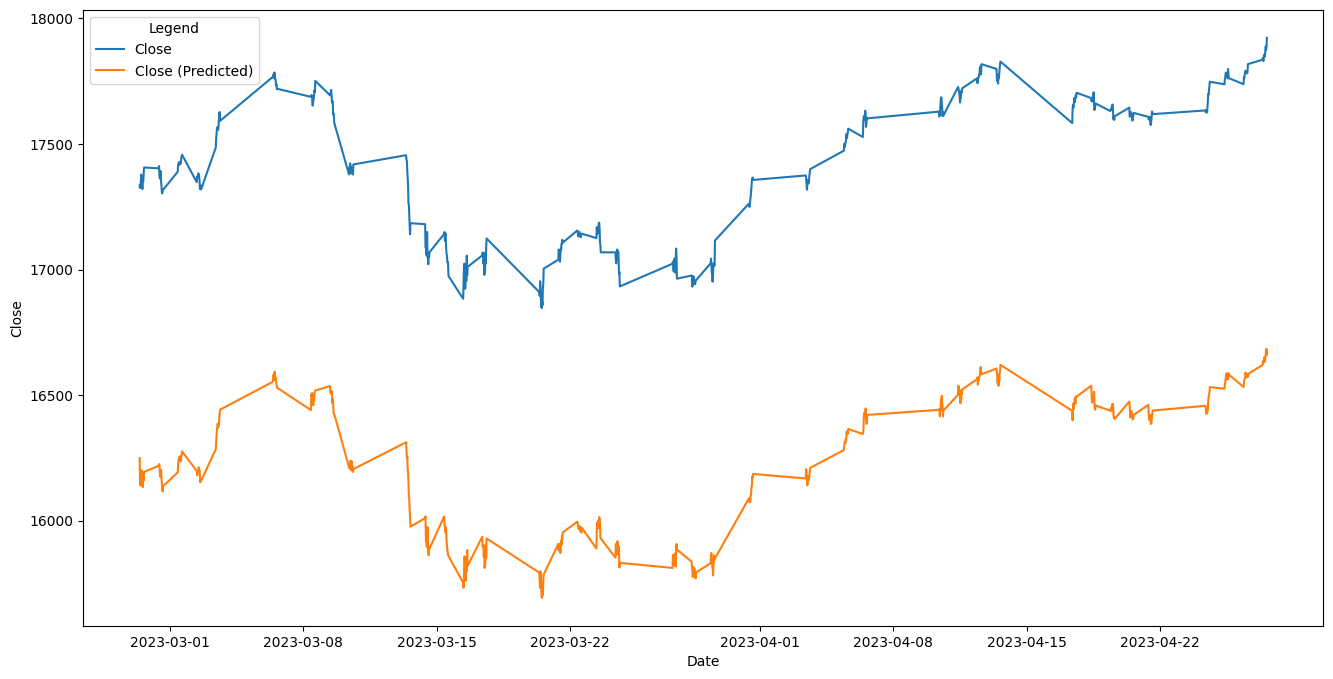

In [40]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Date'], y=labels['Close'], label= 'Close')
sns.lineplot(x=data['Date'], y=predDF['closePred'], label= 'Close (Predicted)')
plt.legend(title= 'Legend')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Date'], y=labels['High'], label= 'High')
sns.lineplot(x=data['Date'], y=predDF['highPred'], label= 'High (Predicted)')
plt.legend(title= 'Legend')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=data['Date'], y=labels['Low'], label= 'Low')
sns.lineplot(x=data['Date'], y=predDF['lowPred'], label= 'Low (Predicted)')
plt.legend(title= 'Legend')
plt.show()